# McLean's Flight Time Code

A model in level flight has four basic forces at work: lift, weight, drag, and thrust. The total lift force must equal the weight of the model, and the total drag force must equal the thrust for the flight to remain level. Therefore:

\begin{equation}
L_t = W_t
\end{equation}

where:

\begin{equation}
L_t = L_w + L_s
\end{equation}
and

\begin{equation}
D_t = T
\end{equation}

## Lift and Drag Forces

The flying surfaces generate the lift and drag, and we are concerned that our airfoils on these surfaces meet our overall goals of a stable, efficient flight. But without getting too deep into the theory, basically, the movement of the airfoil through the air causes a pressure distribution to appear on the surface of the surface, and a shear force due to the friction between the air and the surface itself. If we integrate the sum of both pressure and shear forces, we will come up with an overall aerodynamic force acting on that flying surface. the vertical component of that force is called *lift* and the horizontal component is called *drag*.It turns out that the overall aerodynamic force acts at something called the *center of pressure*, which is an inconvenient place to deal with because it moves around with angle of attack. So, by convention, we say the lift and drag forces act on an *aerodynamic center which is located at at the quarter chord point on the surface. Since this point is not at the center of pressure, applying a force there will generate a moment about the real center of pressure, so we add in that moment to get the total forces acting on the surface.

In level flight, we want the forces to balance,meaning we need for the lift to equal the weight, the thrust to equal the drag. Wemust alsomake sure that the moments all sum to zero so the airplane remains level. We measure the moments by using the *center of gravity* as a reference point, since the weight is acting through that point. For that reason, we will calculate moments for all forces using the **cg** reference point.

In the development below, we are assuming that the weight, thrust and drag all act through the **CG**, so they do not contribute to the moment calculations.

For each flying surface, we will have two moment contributions: one due to the lift force acting at some distance from the **CG**, and a second due to the pitching moment of the airfoil. Here is a simple diagram showing the basic geometry we will be using:

In [42]:
%reload_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


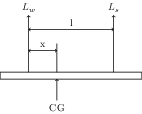

In [43]:
%%tikz
\draw (0,0) -- (5,0) -- (5,-0.25) -- (0,-0.25) -- cycle;
\draw[->] (1,0) -- (1,2) node[above]{$L_w$};
\draw[->] (4,0) -- (4,2) node[above]{$L_s$};
\node[below] at (2,-1){CG};
\draw[->] (2,-1) -- (2,-0.25);
\draw[<->](1,1.5) -- node[above]{l}(4,1.5);
\draw[<->](1,0.75) -- node[above]{x} (2,0.75);
\draw (2,0) -- (2,1);

By convention a positive pitching moment results in a nose up condition. 

We define three basic aerodynamic coefficients:
    
\begin{equation}
C_l = \frac{L}{q S}
\end{equation}

Where $L$L is the lift, $q$ is the dynamic pressure $\frac{1}{2}\rho u^2$, and S is the surface area.

Similarly:

\begin{equation}
C_d = \frac{D}{q S}
\end{equation}

and

\begin{equation}
C_m = \frac{M}{q S c}
\end{equation}

In these equations, $D$ is the drag force, and $c$ is the chord.

From this point, we will use *Python* *SymPy* to help us with the derivations we need.

In [3]:
import sympy

In [45]:
L_w, S_w, C_w, C_lw, C_mw= sympy.symbols('L_w S_w C_w C_lw C_mw')
L_s, S_s, C_s, C_ls, C_ms = sympy.symbols('L_s S_s C_s C_ls C_ms')
q,l,x = sympy.symbols('q l x')

From of diagram, we can calculate the moments due to lift from the wing and stab:

In [46]:
M_w = L_w * x
M_s = - L_s * (l - x)

The moments for the wing and stab are:

In [49]:
M_pw = C_mw * q * S_w * C_w
M_ps = C_ms * q * S_s * C_s

Our equilibrium condition says that all of these moments must sum to zero. 

In [50]:
eq1 = M_w + M_s + M_pw + M_ps
eq1

C_ms*C_s*S_s*q + C_mw*C_w*S_w*q - L_s*(l - x) + L_w*x

We need to use the lift coefficient definitions to eliminate the lift terms here:

In [57]:
eq2 = eq1.subs(L_w, C_lw * q * S_w)
eq3 = eq2.subs(L_s, C_ls * q *S_s)
eq3

-C_ls*S_s*q*(l - x) + C_lw*S_w*q*x + C_ms*C_s*S_s*q + C_mw*C_w*S_w*q

McLean assumed a lift coefficient of 1 for the wing, and used this equation to calculate the lift coefficient for the stab. Let's solve this expression for the stab lift coefficient:

In [58]:
eq4 = sympy.solve(eq3, C_ls)
eq5 = eq4[0]
eq5

(C_lw*S_w*x + C_ms*C_s*S_s + C_mw*C_w*S_w)/(S_s*(l - x))

```{note}
The *SymPy* solver returns a list of expressions, so we index that list here
```

Does this match McLean's equation?

In [59]:
eq6 = (- x/C_w + C_mw + C_ms * S_s * C_s/(S_w*C_w))/((1 + x/l)*S_s * l /(S_w*C_w))
eq6

C_w*S_w*(C_ms*C_s*S_s/(C_w*S_w) + C_mw - x/C_w)/(S_s*l*(1 + x/l))

That does not look the same, can *SymPy* help?

In [60]:
eq7 = eq5.expand()
eq7

C_lw*S_w*x/(S_s*l - S_s*x) + C_ms*C_s*S_s/(S_s*l - S_s*x) + C_mw*C_w*S_w/(S_s*l - S_s*x)

In [62]:
eq8 = eq6.expand()
eq8

C_ms*C_s*S_s/(S_s*l + S_s*x) + C_mw*C_w*S_w/(S_s*l + S_s*x) - S_w*x/(S_s*l + S_s*x)

Now we see a problem, the signs in the denominator of these terms are different. Why?

Let's check our formula if the pitching moments are both zero. That means the moment from the wing lift must equal the moment from the tail lift.

First, we eliminate the moment coefficient terms:

In [68]:
eq9 = eq5.subs(C_mw,0)
eq10 = eq9.subs(C_ms,0)
eq10

C_lw*S_w*x/(S_s*(l - x))

Our equilibrium equation is now:

In [71]:
eq11 = C_lw * q * S_w* x - eq10 * q * S_s * (l-x)
eq11

0

This is what we want to see. The expression and development we worked through look to be correct!

Let's try the same idea using the equation in the paper:

In [74]:
eq12 = eq6.subs(C_mw,0)
eq13 = eq12.subs(C_ms,0)
eq13.expand()

-S_w*x/(S_s*l + S_s*x)

Clearly, this will not work when we try our equilibrium expression. I am going to let this go as a typo in McLean's report.

In [76]:
eq14 = C_lw * q * S_w* x - eq13 * q * S_s * (l-x)
eq14

C_lw*S_w*q*x + S_w*q*x*(l - x)/(l*(1 + x/l))

In [ ]:
Definitely not zero!

## Total Lift Coefficient

The total lift is the sum of the ift from the wing and tail. Tus the total lift coefficient is just the sum of the wing and stab lift coefficients:

In [79]:
C_ltotal = C_lw + eq5
C_ltotal

C_lw + (C_lw*S_w*x + C_ms*C_s*S_s + C_mw*C_w*S_w)/(S_s*(l - x))

From McLean's equation we get this:

In [ ]:
M_Ltotal = C_lw + 

- $C_{lf} = 1.0$ - wing lift coefficient
- $C_{mf} = -0.10$ - wing pitching moment
- $C_{mr} = -0.05$ - stab pitching moment
- $S_f = 30.0$ - wing area rule limit for A6 class
- $S_r = 15.0$ - stab surface area (~50%)
- $b_f = 15.5$ - projected span (TODO fix this)
- $C_f = 1.94$ - mean aerodynamic chord of wing ($S_f / b_f$)